In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fontTools.ttLib.ttVisitor import visit
from numpy.ma.core import anomalies


## git@github.com:trekhleb/homemade-machine-learning.git

class Ml_KMeans():
    def __init__(self, data, n_clusters: int):
        self.data = data
        self.n_clusters = n_clusters

    def train(self, max_iter: int = 100):
        ## 初始化中心点
        centroids = Ml_KMeans.centroids_init(data=self.data, n_clusters=self.n_clusters)
        closet_centroids_ids = np.zeros((self.data.shape[0], 1))
        for _ in range(max_iter):
            ## 计算样本距离(中心点列表中)最近的中心点索引
            closet_centroids_ids = Ml_KMeans.centroids_find_closet(data=self.data, centroids=centroids)
            ## 更新中心点位置
            centroids = Ml_KMeans.compute_centroids(self.data, centroids, closet_centroids_ids)
        return centroids, closet_centroids_ids

    @staticmethod
    def centroids_init(data, n_clusters):
        ## 随机中心点, 中心点的个数=预设集群数量, 列数等于样本列数
        random_ids = np.random.permutation(data.shape[0])[:n_clusters]
        return data[random_ids, :]

    @staticmethod
    def centroids_find_closet(data, centroids):
        num_samples = data.shape[0]
        n_clusters = centroids.shape[0]
        ## 对每个样本进行遍历,标记它所属的最近的中心点的index
        # centroid_distances = np.zeros((num_samples, n_clusters))
        # for data_index in range(num_samples):
        #     for centroid_index in range(n_clusters):
        #         distance_diff = centroids[centroid_index] - data[data_index]
        #         centroid_distances[data_index, centroid_index] = np.sum(distance_diff ** 2)
        # closet_centroids_ids = centroid_distances.argmin(axis=1)

        # closet_centroids_ids = np.zeros((num_samples, 1))
        # for data_index in range(num_samples):
        #     distances = np.zeros((n_clusters, 1))
        #     for centroid_index in range(n_clusters):
        #         distance_diff = centroids[centroid_index] - data[data_index]
        #         distances[centroid_index] = np.sum(distance_diff ** 2)
        #     closet_centroids_ids[data_index] = np.argmin(distances)
        return closet_centroids_ids

    @staticmethod
    def compute_centroids(data, centroids, closet_centroids_ids):
        n_clusters = centroids.shape[0]
        centroids = np.zeros((n_clusters, data.shape[1]))
        for centroid_id in range(n_clusters):
            cluster_ids = np.where(closet_centroids_ids == centroid_id)[0]
            centroids[centroid_id] = np.mean(data[cluster_ids], axis=0)
        return centroids


[[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]]


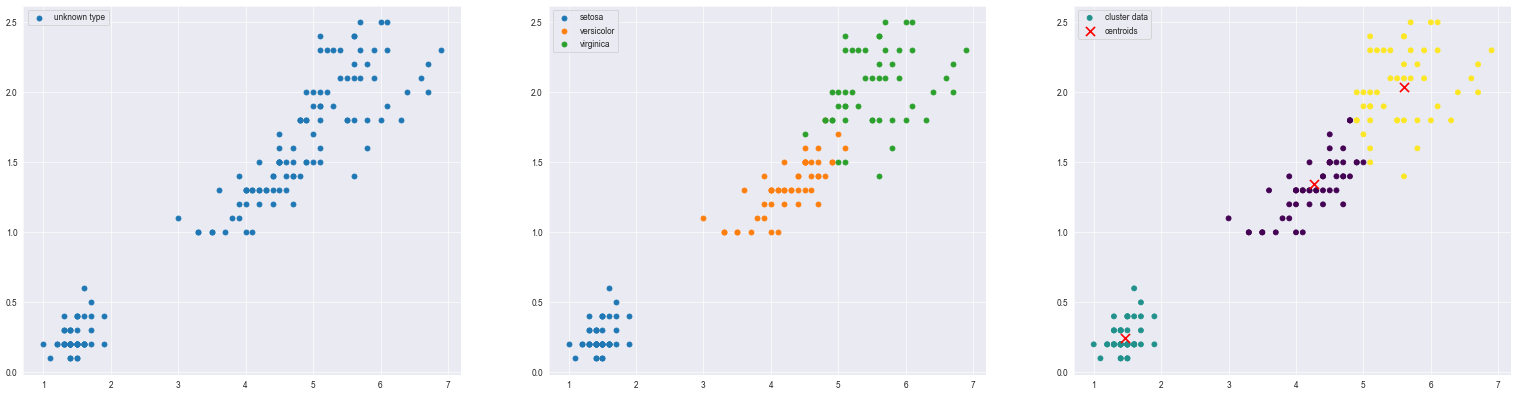

In [92]:
from sklearn.datasets import load_iris

iris_data = load_iris()
# print(iris_data.target_names)
# print(iris_data.feature_names)

X_train = iris_data.data[:, [2, 3]]
y_train = iris_data.target

kmeans = Ml_KMeans(X_train, n_clusters=3)
centroids, closet_centroids_ids = kmeans.train(max_iter=100)
# print(closet_centroids_ids.shape)
# print(y_train.shape)
# print(closet_centroids_ids)
# print(y_train)
print(centroids)

plt.figure(figsize=(32, 8), dpi=60)
plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], label='unknown type')
plt.legend()
plt.subplot(132)
for i,iris_type in enumerate(iris_data.target_names):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=iris_type)
plt.legend()
plt.subplot(133)
plt.scatter(X_train[:, 0], X_train[:, 1], c=closet_centroids_ids, cmap='viridis', label='cluster data')
plt.scatter(centroids[:, 0], centroids[:, 1], s=120, color='r', linewidths=2, marker='x', label='centroids')
plt.legend()
plt.show()

### KMeans实验分析


In [93]:
from sklearn.datasets import make_blobs

blob_centers = np.array([
    [0.2, 3.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

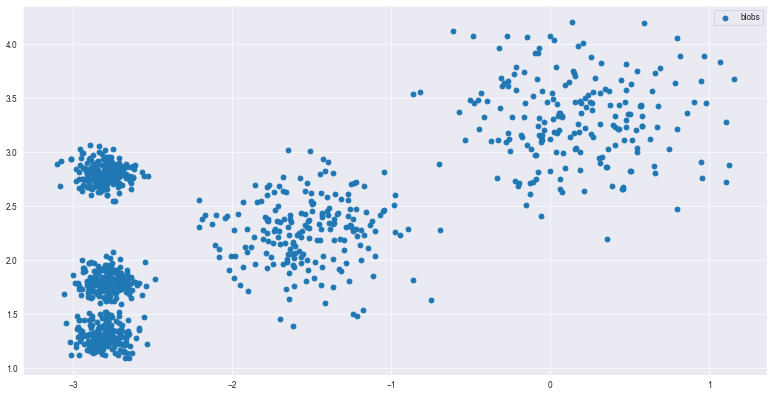

In [138]:
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=1000, n_features=2, centers=blob_centers, cluster_std=blob_std, random_state=0)

plt.figure(figsize=(16, 8), dpi=60)
plt.scatter(X[:, 0], X[:, 1], label='blobs')
plt.legend()
plt.show()

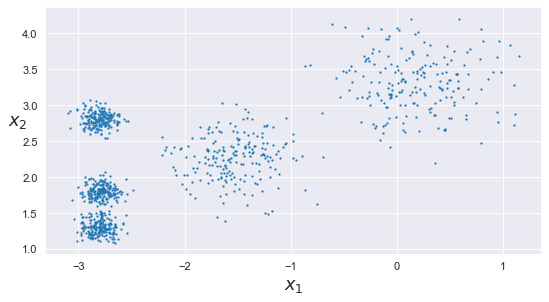

In [143]:
def plot_scatter(X, y=None):
    if y is not None:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap='viridis', label='data')
    else:
        plt.scatter(X[:, 0], X[:, 1], s=1, label='data')
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16, rotation=0)

plt.figure(figsize=(8, 4), dpi=80)
plot_scatter(X)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

print(kmeans.inertia_) ### 相当于损失值
print(kmeans.cluster_centers_) ### 中心点

In [ ]:
y_pred = kmeans.fit_predict(X)
print(y_pred)
print(kmeans.labels_)
## 说明预测的结果与labels结果是一样的
print(np.sum(kmeans.labels_ != y_pred))

In [ ]:
## 预测
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

In [169]:
## 计算每个样点到所有中心点的距离(4个样本, 5个中心点) -> (4, 5)
kmeans.transform(X_new)

array([[2.8888616 , 1.31713824, 2.91494206, 1.55071711, 2.79260613],
       [5.84473282, 3.11571763, 5.85729004, 4.53626384, 5.78896394],
       [1.71224906, 3.18591882, 0.27862241, 1.64696409, 1.21706983],
       [1.21695067, 3.27200922, 0.36301395, 1.49067908, 0.73022376]])

### 决策边界

In [146]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred, kmeans.labels_

(array([1, 1, 0, 3, 0, 4, 1, 3, 2, 4, 4, 3, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2,
        1, 0, 1, 4, 4, 3, 3, 3, 3, 0, 0, 0, 4, 4, 0, 4, 1, 2, 2, 2, 3, 2,
        0, 0, 2, 1, 1, 2, 4, 1, 3, 1, 4, 0, 2, 0, 3, 4, 3, 2, 1, 1, 3, 4,
        3, 2, 1, 1, 3, 4, 1, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 3, 2, 3, 4, 3,
        4, 1, 0, 2, 4, 1, 3, 1, 0, 4, 3, 1, 0, 3, 1, 3, 0, 1, 4, 0, 1, 1,
        0, 1, 2, 1, 0, 0, 4, 3, 3, 1, 2, 0, 3, 3, 4, 3, 1, 1, 4, 1, 1, 4,
        0, 2, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 3, 4, 1, 1,
        4, 2, 2, 3, 1, 1, 1, 1, 2, 0, 1, 3, 2, 4, 3, 4, 0, 0, 1, 2, 4, 1,
        4, 1, 1, 1, 3, 4, 2, 0, 4, 2, 4, 4, 2, 3, 3, 2, 2, 3, 2, 3, 3, 1,
        2, 2, 2, 1, 2, 2, 0, 1, 3, 0, 3, 3, 3, 1, 3, 1, 0, 2, 3, 0, 4, 1,
        4, 1, 1, 3, 2, 0, 0, 4, 1, 0, 4, 2, 0, 0, 3, 2, 2, 2, 1, 3, 0, 0,
        3, 0, 0, 4, 2, 0, 0, 1, 4, 1, 2, 0, 0, 1, 2, 4, 4, 1, 0, 0, 0, 4,
        1, 2, 2, 0, 2, 0, 3, 2, 3, 3, 2, 3, 1, 4, 2, 1, 2, 4, 2, 4, 1, 0,
        2, 4, 4, 3, 1, 4, 3, 0, 0, 3, 

In [206]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o',
                s=30,
                linewidths=8,
                color=circle_color,
                zorder=10,
                alpha=0.9
            )
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x',
                s=50,
                linewidths=1,
                color=cross_color,
                zorder=11,
                alpha=1
            )

def plot_decision_boundary(cluster_model, X, resolution=1000, show_centroids=True,
                           show_xlabels=True, show_ylabels=True):
    x_min = min(X[:, 0]) - 0.1
    x_max = max(X[:, 0]) + 0.1
    y_min = min(X[:, 1]) - 0.1
    y_max = max(X[:, 1]) + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    Z = cluster_model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = Z.reshape(xx.shape[0], yy.shape[0])
    plt.contourf(zz, extent=(x_min, x_max, y_min, y_max), cmap='viridis')
    plt.contour(zz, extent=(x_min, x_max, y_min, y_max), linewidths=1, colors='k')
    plot_data(X)

    if show_centroids:
        plot_centroids(centroids=cluster_model.cluster_centers_)

    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=16)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=16, rotation=0)
    else:
        plt.tick_params(labelleft='off')

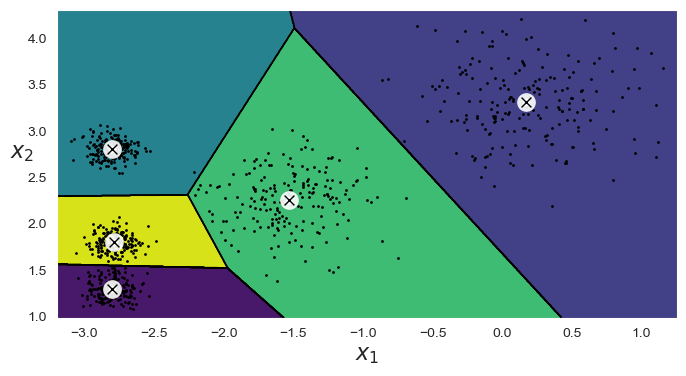

In [207]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(kmeans, X)
plt.show()

### 算法流程

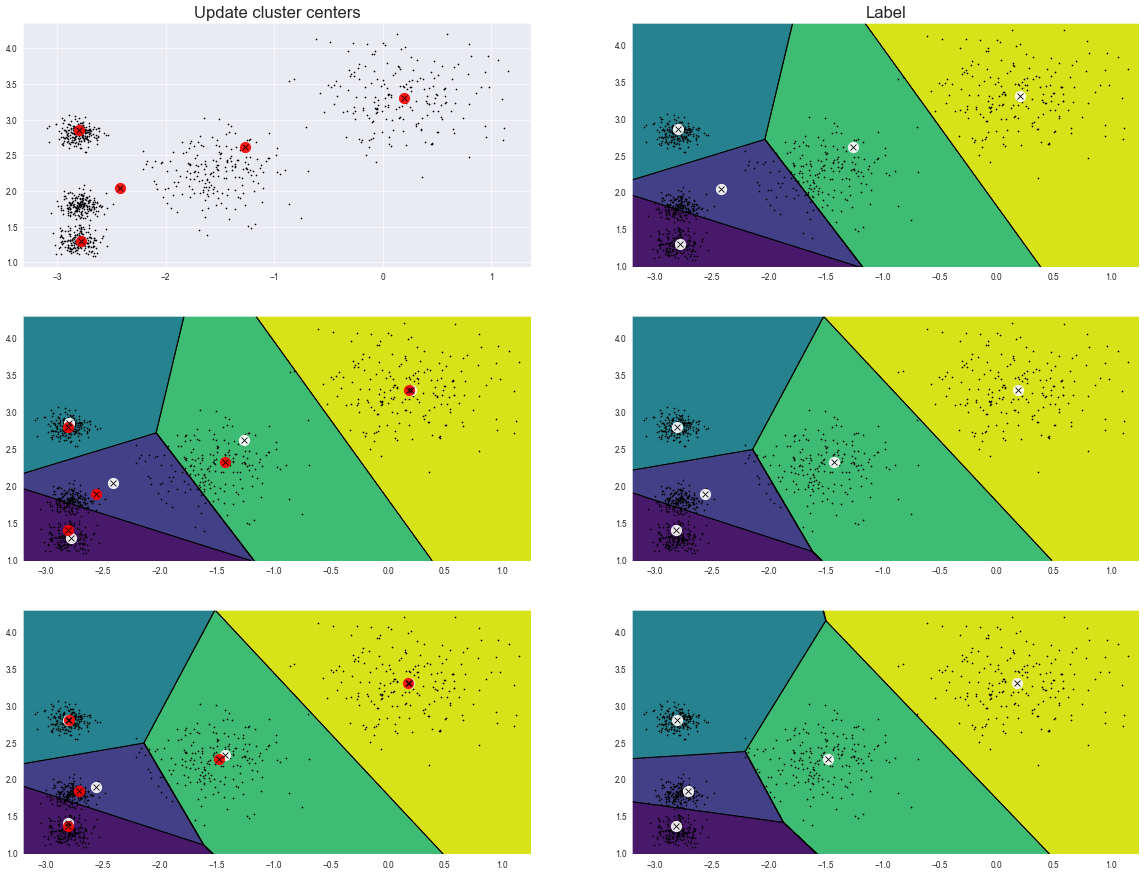

In [245]:
### 画出中心点的更新变化过程,及边界变化
init_centers = np.array([
    [-3, 1],
    [-3, 2],
    [-3, 3.5],
    [-1.5, 4],
    [0.5, 4]
])
kmeans1 = KMeans(n_clusters=5, init=init_centers, n_init=1, max_iter=1, random_state=1)
kmeans2 = KMeans(n_clusters=5, init=init_centers, n_init=1, max_iter=2, random_state=1)
kmeans3 = KMeans(n_clusters=5, init=init_centers, n_init=1, max_iter=3, random_state=1)

kmeans1.fit(X)
kmeans2.fit(X)
kmeans3.fit(X)

plt.figure(figsize=(24, 18), dpi=60)
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans1.cluster_centers_, None, circle_color='r', cross_color='k')
plt.title('Update cluster centers', fontsize=20)

plt.subplot(322)
plot_decision_boundary(kmeans1, X, show_centroids=True, show_xlabels=False, show_ylabels=False)
plt.title('Label', fontsize=20)

plt.subplot(323)
plot_decision_boundary(kmeans1, X, show_centroids=True, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans2.cluster_centers_, None, circle_color='r', cross_color='k')

plt.subplot(324)
plot_decision_boundary(kmeans2, X, show_centroids=True, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundary(kmeans2, X, show_centroids=True, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans3.cluster_centers_, None, circle_color='r', cross_color='k')

plt.subplot(326)
plot_decision_boundary(kmeans3, X, show_centroids=True, show_xlabels=False, show_ylabels=False)

plt.show()

### 不稳定结果

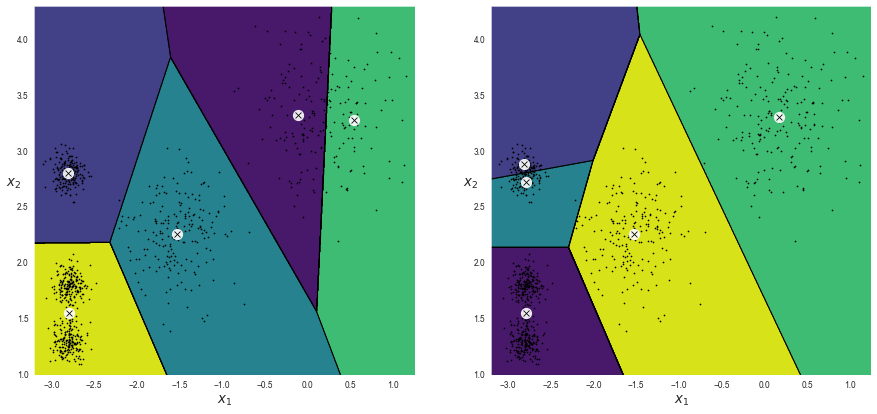

In [257]:
def plot_cluster_compare(c1, c2, X):
    c1.fit(X)
    c2.fit(X)
    plt.figure(figsize=(18, 8), dpi=60)
    plt.subplot(121)
    plot_decision_boundary(c1, X, show_centroids=True, show_xlabels=True, show_ylabels=True)
    plt.subplot(122)
    plot_decision_boundary(c2, X, show_centroids=True, show_xlabels=True, show_ylabels=True)

c1 = KMeans(n_clusters=5, init='random', n_init=1, random_state=1)
c2 = KMeans(n_clusters=5, init='random', n_init=1, random_state=19)
plot_cluster_compare(c1, c2, X)


### 评估方法
- Inertia指标: 每个样本与其质心点的距离

In [309]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X)
print("模型中心点:", kmeans.cluster_centers_)
print("模型计算inertia:", kmeans.inertia_)
# print(kmeans.labels_)

## 反向计算inertia
inertia = 0
for i in range(kmeans.n_clusters):
    label_X = X[kmeans.labels_ == i, :]
    inertia += np.sum(np.sum((label_X - kmeans.cluster_centers_[i, :])**2, axis=1))
print('自定义计算inertia:', inertia)


模型中心点: [[ 0.17558183  3.30805088]
 [-2.79406957  1.55056992]
 [-1.66701472  2.04864609]
 [-2.80182657  2.80414868]
 [-1.37949946  2.48126048]]
模型计算inertia: 121.46992711705063
自定义计算inertia: 121.46992711705062


In [305]:
kmeans.labels_.shape

(1000,)

In [ ]:
## 根据距离来计算inertia
X_dist = kmeans.transform(X)
X_dist[np.arange(X.shape[0]), kmeans.labels_]
np.sum(X_dist[np.arange(X.shape[0]), kmeans.labels_]**2)

In [ ]:
kmeans.score(X)

In [313]:
c1.score(X), c2.score(X), c1.inertia_, c2.inertia_, kmeans.inertia_

(-113.83207541656668,
 -133.5307836330203,
 113.83207541656668,
 133.5307836330203,
 121.46992711705063)

transform得到当前样本到每个簇中心的距离

In [261]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.transform(X_new)

array([[1.31978259, 2.82998448, 1.66772435, 2.91494206, 1.46103744],
       [3.11260904, 5.81147396, 4.66726824, 5.85729004, 4.40586282],
       [3.19048826, 1.46398596, 1.63765809, 0.27862241, 1.70150307],
       [3.2767768 , 0.97150646, 1.40732729, 0.36301395, 1.62060889]])

n_init的目标是多次尝试得到最优的Inertia

## 寻找最优簇数 n_clusters
### 手肘法
- 若n_clusters越大,则得到的inertia会越来越小

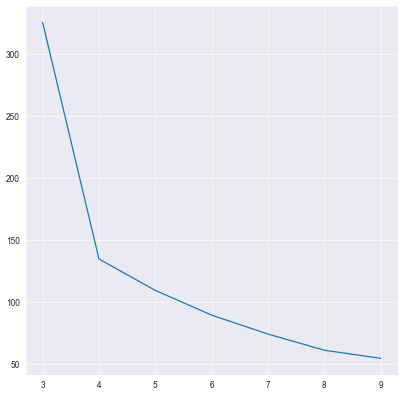

In [315]:
inertia_arr = []
for i in range(3, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia_arr.append(kmeans.inertia_)

plt.figure(figsize=(8, 8), dpi=60)
plt.plot(range(3, 10), inertia_arr)
plt.show()

### 手肘法 选择下降最快的点(附近)
### 这里看得到4最快,但我们知道应该有5个点,所以不能直接认为是4,这只是个参考值

### 轮廓系数法

- $ai$: 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- $bi$: 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}

![](./3.png)

结论:
- si接近1,则说明样本i聚类合理
- si接近-1,则说明样本i更应该分类到另外的簇
- 若si近似0, 则说明样本游离在两个簇的边界上

In [316]:
### 轮廓系数评估方法
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.5656461641386258)

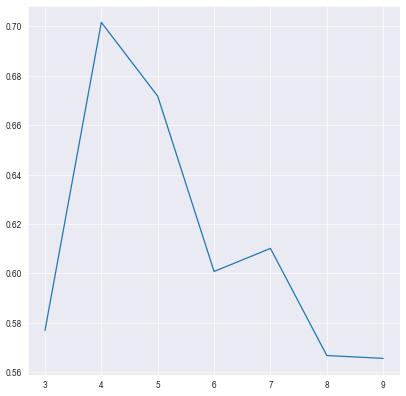

In [320]:
kmeans_model_k = [KMeans(n_clusters=i, random_state=42).fit(X) for i in range(3, 10)]
s8e_scores = []
for model in kmeans_model_k:
    s8e_scores.append(silhouette_score(X, model.labels_))

plt.figure(figsize=(8, 8), dpi=60)
plt.plot(range(3, 10), s8e_scores, label='Silhouette Score')
plt.show()

### 轮廓系数也只能作为参考值

### 测试KMeans存在的问题

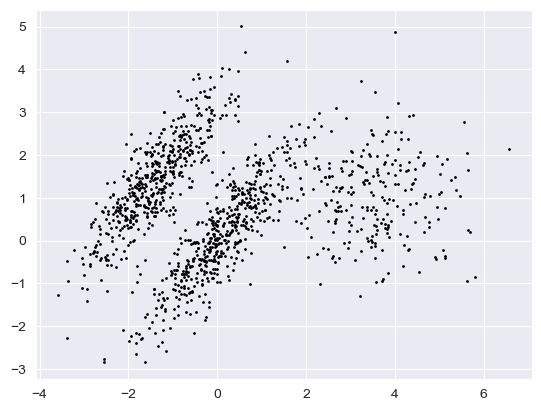

In [352]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_data(X)

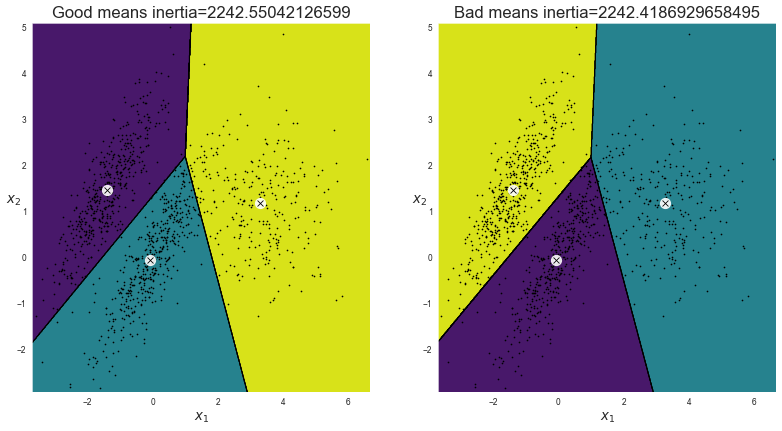

In [353]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(16, 8), dpi=60)
plt.subplot(121)
plot_decision_boundary(kmeans_good, X)
plt.title(f'Good means inertia={kmeans_good.inertia_}', fontsize=20)
plt.subplot(122)
plot_decision_boundary(kmeans_bad, X)
plt.title(f'Bad means inertia={kmeans_bad.inertia_}', fontsize=20)
plt.show()

### inertia也只能作为参考值,有的情况,低的反而比高的模型聚簇效果好

### 用Kmeans来实现图像分割

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
lady = mpimg.imread('../../images/k_means/ladybug.png')
print(lady.shape)

(533, 800, 3)


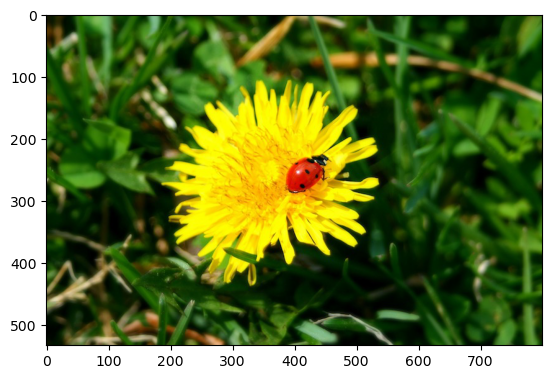

In [8]:
plt.figure()
plt.imshow(lady)
plt.grid(False)
plt.show()

In [358]:
### 将图片的所有像素点 拉平
X = lady.reshape(-1, 3)
print(X.shape) 

(426400, 3)


In [373]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

KMeans(random_state=42)

In [374]:
kmeans.cluster_centers_

array([[0.08850157, 0.23941354, 0.01462715],
       [0.98418427, 0.9405322 , 0.02599234],
       [0.60341763, 0.6332412 , 0.39100087],
       [0.33939832, 0.52079594, 0.14956477],
       [0.20293087, 0.36920896, 0.05031982],
       [0.9005823 , 0.7403834 , 0.03205986],
       [0.61344457, 0.38928717, 0.09298015],
       [0.02053913, 0.10418773, 0.00553875]], dtype=float32)

In [375]:
kmeans.labels_

array([7, 7, 7, ..., 0, 0, 7], dtype=int32)

In [376]:
### kmeans实现图像分割的核心 就是用中心点的颜色,去替换同个簇的样本点的颜色
### 即聚簇越少,颜色颜色,区分越明显
### 颜色值如果是小数,在imshow的时候,会自动转成rgb三色,即都乘以255
newImg = kmeans.cluster_centers_[kmeans.labels_]

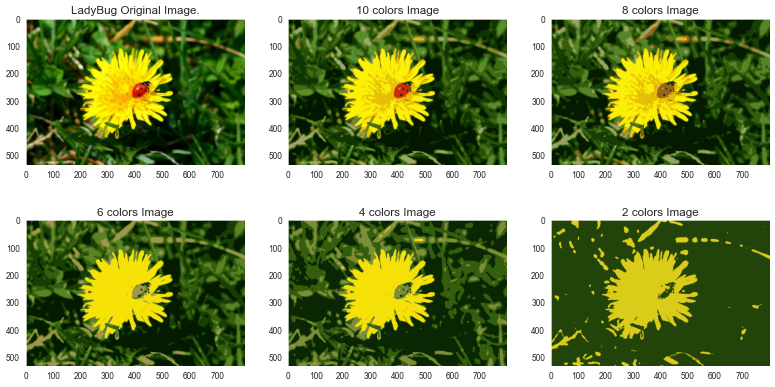

In [381]:
newImgs = []
for k in [10, 8, 6, 4, 2]:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    kmeans_k.fit(X)
    newImg = kmeans_k.cluster_centers_[kmeans_k.labels_]
    newImgs.append(newImg.reshape(533, 800, 3))

plt.figure(figsize=(16, 8), dpi=60)
plt.subplot(231)
plt.imshow(lady)
plt.grid(False)
plt.title('LadyBug Original Image.', fontsize=14)

for idx, img in enumerate(newImgs):
    plt.subplot(232 + idx)
    plt.imshow(img)
    plt.grid(False)
    plt.title(f"{10 - 2 * idx} colors Image", fontsize=14)
plt.show()

### 半监督学习

- 将训练集聚类为50个集群,对每个聚类,寻找最靠近质心的图像,将这些图像称为代表性图像.

In [2]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [4]:
from sklearn.linear_model import LogisticRegression
### 训练数据中,有50个数据有标签(总样本数1347个)
n_labeled = 50

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)
### 从评分可知道,已有的标签不全是对的,且得分较低,说明样本数太少了

0.8533333333333334

In [6]:
### 训练50个簇,获取所有样本到簇中心的距离,那么这些簇中心点具备代表性
from sklearn.cluster import KMeans
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
kmeans.cluster_centers_.shape, X_digits_dist.shape

((50, 64), (1347, 50))

- 查找距离中心点最近的样本 (代表性样本)

In [8]:
import numpy as np
### X_digits_dist[i, j] 代表第i个样本到第j个簇中心的距离
### 所有每一列,就代表所有样本到一个簇中心的所有距离, 且最小值就代表该样本到这个簇的最近距离
min_dist_idxs = np.argmin(X_digits_dist, axis=0)
print('典型代表图片的样本索引',min_dist_idxs, min_dist_idxs.shape)
X_representative_digits = X_train[min_dist_idxs]
print('典型代表图片', X_representative_digits.shape)

典型代表图片的样本索引 [ 287 1131  261  541 1074  995  374  854  977   76  736 1243  749  213
  104 1150  230  993   64  203 1001  471  317 1033  281  303 1311  119
 1206  127  276  666  887  210   13  212 1115 1007 1306  414  994  229
 1159  672 1125  353  415 1256  551  740] (50,)
典型代表图片 (50, 64)


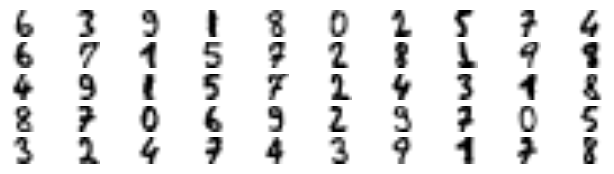

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
for idx, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k//10, 10, idx+1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap='binary', interpolation='bilinear')
    plt.grid(False)
    plt.axis('off')
    idx += 1
plt.show()

- 从显示的结果中手动写出label

In [11]:
### 这个是用肉眼看的数字,设置的labels
# y_representative_digits = np.array([
#     6,8,1,3,0,2,9,6,5,3,
#     4,8,2,4,7,6,7,9,5,0,
#     7,8,8,7,1,9,1,3,7,3,
#     1,5,8,3,6,5,1,3,5,4,
#     1,4,4,2,5,9,6,7,4,4
# ])

### 这个是标签数据, 两个是一样的
y_representative_digits = y_train[min_dist_idxs]


In [13]:
### 重新训练模型,都是50个样本,但是样本采用典型代表的样本点,观察评分
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)
### 评分更高了, 说明样本点具有代表性,准确性更高,比随机样本好

0.8666666666666667

In [19]:
### 传播到其他标签
### 我们将标签传播到同一集群中的所有其他样本
### 我们从聚簇中获取样本的labels, 表示样本属于哪个簇(索引)
### 然后将代表性样本的label值设置为该样本的预测标签,也就是所有的样本都有了属于自己的标签!!!
y_train_propagated = np.empty(X_train.shape[0], dtype=np.int32)
### 遍历每个簇
for i in range(k):
    ### 为样本设置标签值,标签为代表簇的样本标签
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

### 这里设置的最大迭代数是因为没有收敛,对结果没有影响
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9155555555555556

- 选择前20个样本

In [20]:
percentile_closet = 20
### 每个样本到簇中心的最小距离
X_cluster_dist = X_digits_dist[np.arange(X_train.shape[0]), kmeans.labels_]
X_digits_dist[:3, :]

array([[40.95759732, 42.27726561, 44.43650008, 36.70880374, 37.45845699,
        47.36703026, 29.22610202, 43.10329068, 43.58107329, 50.414149  ,
        42.01640206, 50.11258929, 43.67620761, 45.07880051, 47.19430547,
        25.06557929, 38.06734608, 37.48706444, 54.32834333, 46.27534341,
        45.33124541, 41.80790009, 37.88160336, 45.05114549, 39.33427494,
        19.93944234, 48.70814994, 43.42414775, 53.02414117, 35.09915099,
        37.74504061, 40.50904466, 47.58324218, 41.16967795, 42.63382695,
        32.90522612, 38.80385147, 41.90253341, 43.80726544, 45.10131422,
        40.1999204 , 31.70266866, 53.88143635, 52.25804289, 48.06394346,
        38.11575332, 44.59474586, 52.4883291 , 40.00826361, 37.52587649],
       [42.1150641 , 37.1431984 , 29.62752165, 53.20990366, 33.35649862,
        36.63926249, 44.98516466, 37.90982111, 46.95616443, 51.92973648,
        40.65831984, 47.13036818, 46.95151163, 13.67949408, 46.94644966,
        41.59529997, 43.88895629, 47.75332449, 44.

In [21]:
X_cluster_dist

array([19.93944234, 13.67949408, 22.27892708, ..., 18.66107059,
       21.35039349, 21.56830999])

In [26]:
for i in range(k):
    in_cluster = (kmeans.labels_ == 0)
    cluster_dist = X_cluster_dist[in_cluster] ### 选择当前簇的所有样本
    cutoff_distance = np.percentile(cluster_dist, percentile_closet) ### 排序找到前20个样本的距离分界线
    above_cutoff = (X_cluster_dist > cutoff_distance) ### 距离大于分界线的样本
    X_cluster_dist[in_cluster & above_cutoff] = -1 ### 将样本中不符合条件的设置为-1

(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)


In [25]:
partially_propagated = (X_cluster_dist != -1)
print(partially_propagated.shape)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

(1347,)


In [24]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9155555555555556

- 从上面三个结果可以知道,评分越来越好
- 我们从随机的50个样本  0.8888
- 到选择具有代表性的50个样本 0.9177
- 将代表性样本传播到整个训练集中 0.9288
- 最后选择前20个距离最近的传播样本作为训练集 0.9288
- 它的评分越来越高,也就是半监督效果越来越好,聚类对半监督的重要性

### DBSCAN算法

In [32]:
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps  # 邻域半径
        self.min_samples = min_samples  # 最小样本数（包括自身）
        self.labels = None  # 簇标签（-1 表示噪声）

    def fit(self, X):
        """运行 DBSCAN 聚类算法"""
        n_samples = X.shape[0]
        self.labels = np.full(n_samples, -1, dtype=int) # 初始化所有点为未访问（-1）
        curr_cluster_id = 0 ## 当前的簇id

        for point_idx in range(n_samples):
            if self.labels[point_idx] != -1: # 已访问的点跳过
                continue

            # 获取点的邻居
            neighbors = self.get_neighbors(X, point_idx)

            # 如果邻居数 < min_samples，标记为噪声
            if len(neighbors) < self.min_samples:
                self.labels[point_idx] = -1
                continue

            # 是核心点，扩展新簇
            self.labels[neighbors] = curr_cluster_id
            self.expand_cluster(X, neighbors, curr_cluster_id)
            curr_cluster_id += 1
        return self

    def get_neighbors(self, X, point_idx):
        """获取点 point_idx 的邻居（距离 <= eps 的点索引）"""
        distances = np.sqrt(np.sum((X - X[point_idx])**2, axis=1))
        return np.where(distances <= self.eps)[0]

    def expand_cluster(self, X, neighbors, curr_cluster_id):
        """扩展簇，递归添加核心点和边界点"""
        # 将邻居加入簇
        for neighbor_idx in neighbors:
            if self.labels[neighbor_idx] != -1:
                continue

            self.labels[neighbor_idx] = curr_cluster_id
            new_neighbors = self.get_neighbors(X, neighbor_idx)
            # 检查邻居是否为核心点
            # 这里一定要检查是否为核心点,
            # 如果是核心点,则扩展新邻居,添加到簇中
            # 如果是边界点,只分配簇id
            if len(new_neighbors) >= self.min_samples:
                # 如果是核心点，扩展邻居
                neighbors = np.union1d(neighbors, new_neighbors)

    def fit_predict(self, X):
        """拟合并返回簇标签"""
        self.fit(X)
        return self.labels


### 1. **DBSCAN 算法核心概念**
DBSCAN 基于密度的思想，通过定义“高密度区域”来形成簇。它依赖两个关键参数：
- **`eps`（ε）**：邻域半径，定义一个点周围的距离范围。
- **`min_samples`**：成为核心点所需的最小邻居点数（包括点本身）。

#### 点类型
DBSCAN 将数据点分为三类：
- **核心点**：在 `eps` 邻域内有至少 `min_samples` 个点（包括自身）。
- **边界点**：在某个核心点的 `eps` 邻域内，但自身邻居点数少于 `min_samples`。
- **噪声点**：既不是核心点也不是边界点的点。

#### 密度连接
- **密度可达**：如果点 B 在核心点 A 的 `eps` 邻域内，B 是从 A 密度可达的。
- **密度连接**：如果两个点通过一系列核心点（每对相邻核心点距离 ≤ `eps`）连接，它们属于同一簇。

#### 簇定义
一个簇由以下点组成：
- 所有**密度连接**的核心点。
- 核心点的 `eps` 邻域内的边界点。

噪声点不属于任何簇，标记为 -1。

---

### 2. **DBSCAN 算法步骤**
DBSCAN 的工作流程如下：

1. **初始化**：
   - 输入：数据集 `X`、邻域半径 `eps`、最小样本数 `min_samples`。
   - 初始化所有点的标签为未访问（通常用 -1 表示）。

2. **选择未访问点**：
   - 随机选择一个未访问的点，标记为已访问。

3. **检查核心点**：
   - 计算该点的 `eps` 邻域内的点数（包括自身）。
   - 如果邻居数 ≥ `min_samples`，该点是核心点，创建一个新簇（分配新的簇 ID）。
   - 如果邻居数 < `min_samples`，暂时标记为噪声（-1），继续检查下一个点。

4. **扩展簇**：
   - 如果是核心点，将其所有邻居加入当前簇（分配相同的簇 ID）。
   - 对于每个邻居，检查是否为核心点（邻居数 ≥ `min_samples`）。
   - 如果邻居是核心点，递归扩展其邻居（将邻居的邻居加入簇）。
   - 如果邻居是边界点，只分配簇 ID，不进一步扩展。

5. **重复**：
   - 继续选择未访问的点，重复步骤 2-4，直到所有点都被访问。

6. **输出**：
   - 每个点的簇标签（非负整数表示簇 ID，-1 表示噪声）。


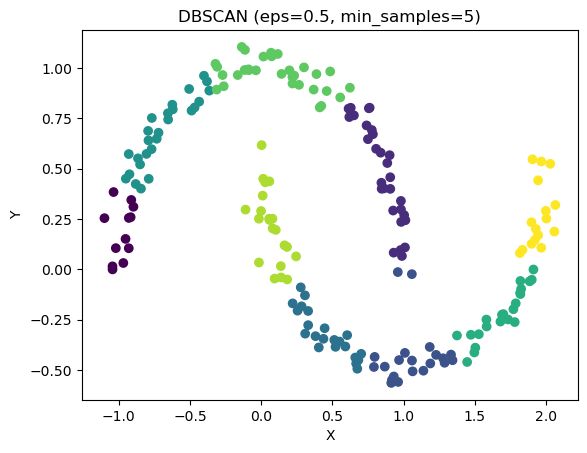

In [48]:
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title(f'DBSCAN (eps={dbscan.eps}, min_samples={dbscan.min_samples})')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [49]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [94]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [95]:
## 簇
np.unique(dbscan.labels_)

## -1代表的是离群点
## 其他的值代表簇id

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [96]:
## 核心点
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [97]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

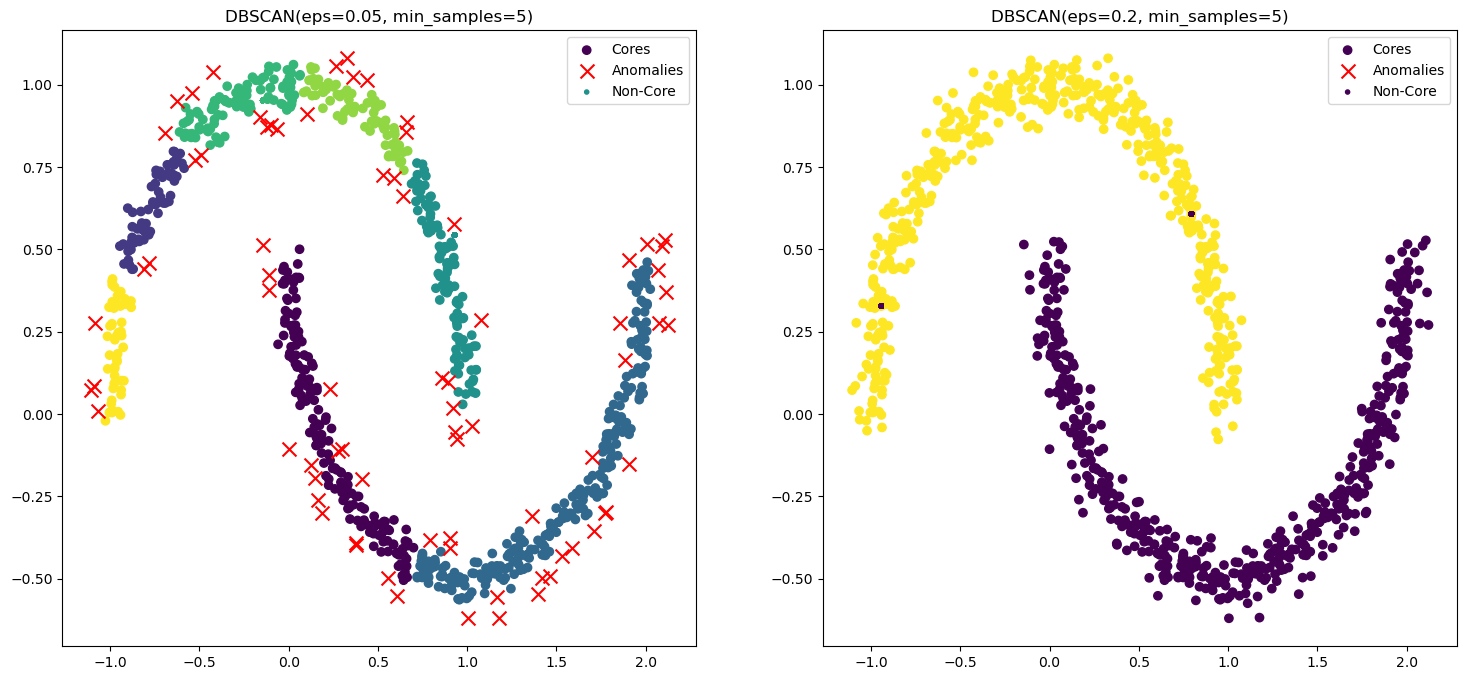

In [109]:

def plot_dbscan(dbscan, X):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    ## 核心点
    core_mask[dbscan.core_sample_indices_] = True
    ## 噪声点
    anomalies_mask = dbscan.labels_ == -1
    ## 非核心点(集群点)
    non_core_mask = ~(dbscan.labels_ | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_core = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', cmap='viridis', label='Cores')
    plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='x', s=100, label='Anomalies')
    plt.scatter(non_core[:, 0], non_core[:, 1], c=dbscan.labels_[non_core_mask], marker='.', label='Non-Core')
    plt.legend()
    plt.title(f'DBSCAN(eps={dbscan.eps}, min_samples={dbscan.min_samples})')

dbscan1 = DBSCAN(eps=0.05, min_samples=5)
dbscan1.fit(X)

dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

plt.figure(figsize=(18, 8))
plt.subplot(121)
plot_dbscan(dbscan1, X)

plt.subplot(122)
plot_dbscan(dbscan2, X)
plt.show()

In [103]:
core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_mask[dbscan.core_sample_indices_] = True
print(np.sum(core_mask))
core_mask.shape

808


(1000,)

In [102]:
anomalies_mask = dbscan.labels_ == -1
print(np.sum(anomalies_mask))
anomalies_mask.shape

77


(1000,)

In [106]:
non_core_mask = ~(core_mask | anomalies_mask)
print(np.sum(non_core_mask))
non_core_mask.shape

115


(1000,)

### eps 和 min_samples的选择,可以用轮廓系数或者手肘法